In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import bilby
import numpy as np
import time

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

%matplotlib inline

In [1]:
#test for eccn package
from eccn.functions import eccentric_waveform

In [2]:
eccentric_waveform

<function eccn.functions.eccentric_waveform(frequency_array_, chirp_mass, mass_ratio, initial_eccentricity, luminosity_distance, theta_jn, psi, phase, geocent_time, ra, dec, **kwargs)>

In [3]:
t1 = time.time()

zz = eccentric_waveform([105.],19.564163812778446,0.9148936170212766,0.1,600.0,0.4,0.1,1.2,1180002601.0,45,5.73)

t2 = time.time()
t = t2 - t1
print("%.20f" % t)

0.00450825691223144531


In [4]:
zz

{'plus': array([1.11684598e-25+1.77240903e-25j]),
 'cross': array([-1.76643375e-25+1.11308083e-25j])}

In [5]:
sampling_frequency = 1024.0
duration = 4.0
#geocent_time = 1180002601.0
#start_time = geocent_time - duration + 0.02

#chirp_mass = 19.564163812778446
#mass_ratio = 0.9148936170212766
#mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5) = 23.499999999999996
#mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5) = 21.499999999999993
#eta = (mass_1*mass_2)/((mass_1+mass_2)**2) = 0.24950617283950624
#lso_f = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) ) = 97.6892230430889
injection_parameters = dict(chirp_mass=19.564163812778446, mass_ratio=0.9148936170212766, initial_eccentricity=0.1, luminosity_distance=400.0, theta_jn=0.4, psi=0.1, phase=1.2, geocent_time = 1180002601.0, ra=45.0, dec=5.73)

waveform_generator = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=eccentric_waveform)

16:46 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: eccn.functions.eccentric_waveform
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [6]:
minimum_frequency = 20.0+3.0
maximum_frequency = 100.0-3.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=injection_parameters['geocent_time'] - 3)
ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

/home/hemantakumar.phurailatpam/anaconda3/envs/bilby/lib/python3.7/site-packages/bilby/gw/detector/psd.py:356: RuntimeWarning: invalid value encountered in multiply
  frequency_domain_strain = self.__power_spectral_density_interpolated(frequencies) ** 0.5 * white_noise
16:46 bilby INFO    : Injected signal in H1:
16:46 bilby INFO    :   optimal SNR = 48.94
16:46 bilby INFO    :   matched filter SNR = 47.69+0.40j
16:46 bilby INFO    :   chirp_mass = 19.564163812778446
16:46 bilby INFO    :   mass_ratio = 0.9148936170212766
16:46 bilby INFO    :   initial_eccentricity = 0.1
16:46 bilby INFO    :   luminosity_distance = 400.0
16:46 bilby INFO    :   theta_jn = 0.4
16:46 bilby INFO    :   psi = 0.1
16:46 bilby INFO    :   phase = 1.2
16:46 bilby INFO    :   geocent_time = 1180002601.0
16:46 bilby INFO    :   ra = 45.0
16:46 bilby INFO    :   dec = 5.73
16:46 bilby INFO    : Injected signal in L1:
16:46 bilby INFO    :   optimal SNR = 28.78
16:46 bilby INFO    :   matched filter SNR = 27.54

[{'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])},
 {'plus': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'cross': array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])}]

16:46 bilby INFO    : Injected signal in H1:
16:46 bilby INFO    :   optimal SNR = 48.94
16:46 bilby INFO    :   matched filter SNR = 96.62+0.40j
16:46 bilby INFO    :   chirp_mass = 19.564163812778446
16:46 bilby INFO    :   mass_ratio = 0.9148936170212766
16:46 bilby INFO    :   initial_eccentricity = 0.1
16:46 bilby INFO    :   luminosity_distance = 400.0
16:46 bilby INFO    :   theta_jn = 0.4
16:46 bilby INFO    :   psi = 0.1
16:46 bilby INFO    :   phase = 1.2
16:46 bilby INFO    :   geocent_time = 1180002601.0
16:46 bilby INFO    :   ra = 45.0
16:46 bilby INFO    :   dec = 5.73
16:46 bilby INFO    : Injected signal in L1:
16:46 bilby INFO    :   optimal SNR = 28.78
16:46 bilby INFO    :   matched filter SNR = 56.32+0.59j
16:46 bilby INFO    :   chirp_mass = 19.564163812778446
16:46 bilby INFO    :   mass_ratio = 0.9148936170212766
16:46 bilby INFO    :   initial_eccentricity = 0.1
16:46 bilby INFO    :   luminosity_distance = 400.0
16:46 bilby INFO    :   theta_jn = 0.4
16:46 bil

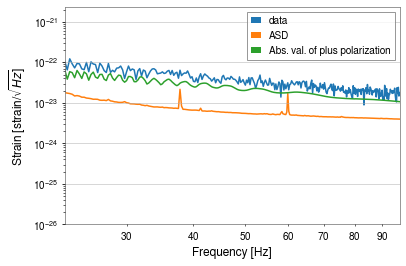

In [7]:
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

ax.set_xlim(minimum_frequency,maximum_frequency)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [8]:
#SNR
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

56.77078845254031

In [22]:
prior = injection_parameters.copy()
prior['eccentricity'] = bilby.core.prior.LogUniform(name='eccentricity', minimum=0.01, maximum=0.2)

likelihood = bilby.gw.likelihood.GravitationalWaveTransient(interferometers=ifos, waveform_generator=waveform_generator, priors=prior)

In [ ]:
result = bilby.run_sampler(likelihood=likelihood, priors=prior, sampler='dynesty', outdir='short', label="eccn", nlive=500, dlogz=3, npool=8)

In [ ]:
start=1126259461.4, end=1126259465.4

In [9]:
1126259463.4-2

1126259461.4